## Question 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ten_armed_testbed_sample_averages():
    # Initialize
    arms = 10
    epsilon = 0.1
    timestamps = 10000
    episodes = 2000
    rewards = [0 for i in range(0,timestamps)]
    optimal_arm = [0 for i in range(0,timestamps)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = [0 for i in range(0,arms)]

        #Step 2 : simulate 10-arm bandit for 10000 timestamps
        Qt = [0.0 for i in range(0,arms)]
        Nt = [0 for i in range(0,arms)]

        for iteration in range (0,timestamps):
            # arm chosen in timestamp t is At
            # corresponding reward is Rt
            # optimal arm is true_At 
            
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)

            # Step 1 : Choose arm
            if np.random.uniform(0,1) < epsilon :
                # choose random arm
                At = np.random.randint(0,arms,dtype=int)
            else:
                # choose greedy arm
                At = np.argmax(Qt)

            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],1)
            
            # Step 3 : Update true_q
            increment_by = np.random.normal(0,0.01,arms)
            for i in range(0,arms):
                true_q[i] += increment_by[i]

            # Step 4 : Update Qt, Nt, rewards and optimal_arm_selection
            Nt[At] += 1
            Qt[At] += (Rt-Qt[At])/Nt[At]
            rewards[iteration] += Rt
            if At == true_At:
                optimal_arm[iteration] += 1

    for iteration in range(0, timestamps):
        rewards[iteration] /= episodes
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
    
    return rewards,optimal_arm

In [3]:
def ten_armed_testbed_constant_stepsize():
    # Initialize
    arms = 10
    epsilon = 0.1
    timestamps = 10000
    episodes = 2000
    stepsize = 0.1
    rewards = [0 for i in range(0,timestamps)]
    optimal_arm = [0 for i in range(0,timestamps)]
    
    for episode in range(0, episodes):
        # Step 1 : assign q*(a) for all arms a
        true_q = [0 for i in range(0,arms)]

        #Step 2 : simulate 10-arm bandit for 10000 timestamps
        Qt = [0.0 for i in range(0,arms)]

        for iteration in range (0,timestamps):
            # arm chosen in timestamp t is At
            # corresponding reward is Rt
            # optimal arm is true_At 
            
            # Step 0 : Get optimal arm
            true_At = np.argmax(true_q)

            # Step 1 : Choose arm
            if np.random.uniform(0,1) < epsilon :
                # choose random arm
                At = np.random.randint(0,arms,dtype=int)
            else:
                # choose greedy arm
                At = np.argmax(Qt)

            # Step 2 : Receive reward
            Rt = np.random.normal(true_q[At],1)
            
            # Step 3 : Update true_q
            increment_by = np.random.normal(0,0.01,arms)
            for i in range(0,arms):
                true_q[i] += increment_by[i]

            # Step 4 : Update Qt, rewards and optimal_arm_selection
            Qt[At] += stepsize*(Rt-Qt[At])
            rewards[iteration] += Rt
            if At == true_At:
                optimal_arm[iteration] += 1

    for iteration in range(0, timestamps):
        rewards[iteration] /= episodes
        optimal_arm[iteration] = (optimal_arm[iteration]*100)/episodes
    
    return rewards,optimal_arm

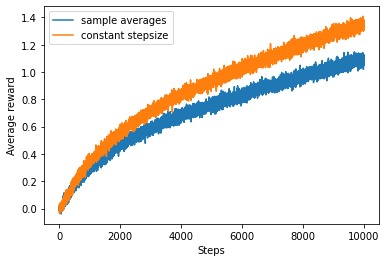

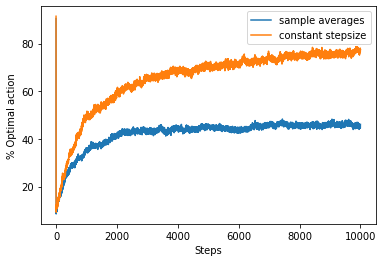

In [4]:
timestamps = 10000
time = [i for i in range(1,timestamps+1)]

rewards1,optimal_arm1 = ten_armed_testbed_sample_averages()
rewards2,optimal_arm2 = ten_armed_testbed_constant_stepsize()

# plotting figure 1 - Average reward
plt.figure()
plt.plot(time, rewards1, label='sample averages')
plt.plot(time, rewards2, label='constant stepsize')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

# plotting figure 2 - % Optimal action
plt.figure()
plt.plot(time, optimal_arm1, label='sample averages')
plt.plot(time, optimal_arm2, label='constant stepsize')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.show()